# NNs for splicing in genomic data

Let's try our NNs with genomic splicing data from the same pipeline as last year...

Maybe we can average the results of the various networks?

In [85]:
%matplotlib inline
import os
import sys

from keras.models import model_from_json
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../src/'))
import nn_utils
import draw_logo
import genomic_data
reload(genomic_data)

<module 'genomic_data' from '/home/yjzhang/Grad_School/research_notebooks/alternative_splicing_neural_nets/src/genomic_data.pyc'>

In [19]:
wt_seqs, mut_seqs, wt_psi, hal_dpsi, actual_dpsi = genomic_data.load_hal_test_data()

In [22]:
models_max = {}
models_avg = {}
path1 = '../data/2017-04-14-models/'
path2 = '../data/2017-04-15-models/'
cell_types = ['HEPG2', 'MCF7', 'CHO', 'HELA', 'LNCAP', 'HEK']
for c in cell_types:
    models_max[c] = model_from_json(open(os.path.join(path1, c + '.json')).read())
    models_max[c].load_weights(os.path.join(path1, c+'.h5'))
    models_avg[c] = model_from_json(open(os.path.join(path2, c + '.json')).read())
    models_avg[c].load_weights(os.path.join(path2, c+'.h5'))

In [39]:
psi_preds_max_models = {}
psi_preds_avg_models = {}
for c, m in models_max.iteritems():
    psi_preds_max_models[c] = genomic_data.get_delta_psis(m, wt_seqs, mut_seqs, wt_psi)
    psi_preds_avg_models[c] = genomic_data.get_delta_psis(models_avg[c], wt_seqs, mut_seqs, wt_psi)

In [71]:
r2_score(actual_dpsi, psi_preds_avg_models['HEK'])

0.009236016043818962

In [30]:
mean_dpsi = np.mean

Elemwise{add,no_inplace}.0

In [77]:
preds_max = np.array([m for c,m in psi_preds_max_models.iteritems()])
preds_avg = np.array([m for c,m in psi_preds_avg_models.iteritems()])

In [80]:
p1 = preds_max.mean(0)
p2 = preds_avg.mean(0)

In [92]:
plt.scatter(p2, p1)

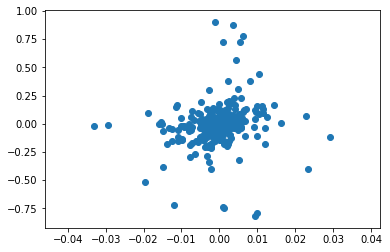

In [93]:
plt.scatter(p2, actual_dpsi)

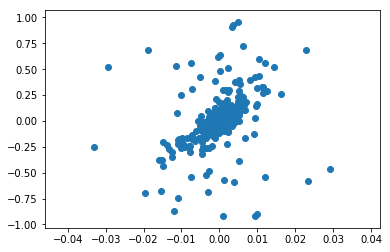

In [95]:
plt.scatter(p2, hal_dpsi)